## Shape Matching

**cv2.matchShapes(contour template, contour, method, method parameter)**

**Output** – match value (lower values means a closer match)

- Contour Template – This is our reference contour that we’re trying to find in the new image
- Contour – The individual contour we are checking against
- Method – Type of contour matching (1, 2, 3)
- Method Parameter – leave alone as 0.0 (not fully utilized in python OpenCV)


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

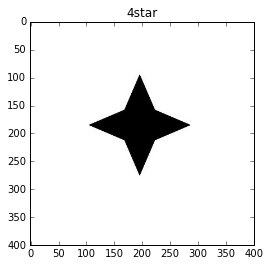

In [2]:
# Load the shape template or reference image
template = cv2.imread('../../images/4star.jpg',0)
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title('4star')
cv2.imwrite('4star.jpg', template)
plt.show()

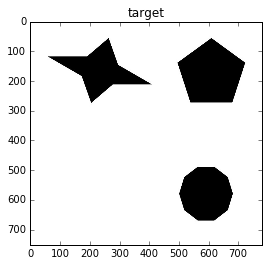

In [3]:
# Load the target image with the shapes we're trying to match
target = cv2.imread('../../images/shapestomatch.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title('target')
cv2.imwrite('target_before.jpg', target)
plt.show()

In [4]:
# Threshold first image before using cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
# Find contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
# We extract the second largest contour which will be our template contour
template_contour = contours[1]

In [5]:
# Threshold first image before using cv2.findContours
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)
# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

0.130818167839
0.159020053398
0.149879156825
0.0709403447448


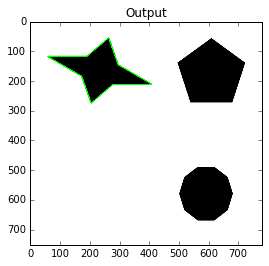

True

In [6]:
for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print match
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = []         
        
                
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)

plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title('Output'); plt.show()
cv2.imwrite('target_after.jpg', target)

http://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html